## KP Model Slider graphs

This Notebook creates an interactive slider to scroll through 100 antigenicity values and plot 2000 time points for each.

Ensure this file has access to the '0001_c_sweep_0' and '0003_c_sweep_ga_0' folders as it pulls data from prerun simulations. This is due to each run of 2000 steps take about 50-60s to run when using the GA.

In [8]:
# slider notebook
%reset -f

# autoreload imports
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import pandas as pd
import csv
import glob
import os
import re

# use the matplotlib widget backend for interactive plots
%matplotlib widget

# import matplotlib for static plots and widgets
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

# import plotly for interactive plots
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

from Visualization.pop_plotting import plot_doub_init, plot_doub_update
from Visualization.pop_plotting import plot_quad_init, plot_quad_update
from Visualization.data_handling import load_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Slider for antigenicity (c) sweep without immunotherapy treatment.

These plots are for the KP model without any of the external input the GA would be controlling.
As you can see, the system switches between oscillating and non-oscillating behavior whne you scroll through c values.

In [14]:
# get list of files in the output data directory
filepath = glob.glob('Output_data/0001_c_sweep_0/simu_data_0001_c_*_.csv')

print(len(filepath), "files found.")

# function to load data based on antigenicity value
def load_idx1(idx: int):
    path = filepath[idx]

    """
    Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
    """
    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data(path)
    return t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness

100 files found.


Reading data from Output_data/0001_c_sweep_0/simu_data_0001_c_1.0444444444444445_.csv


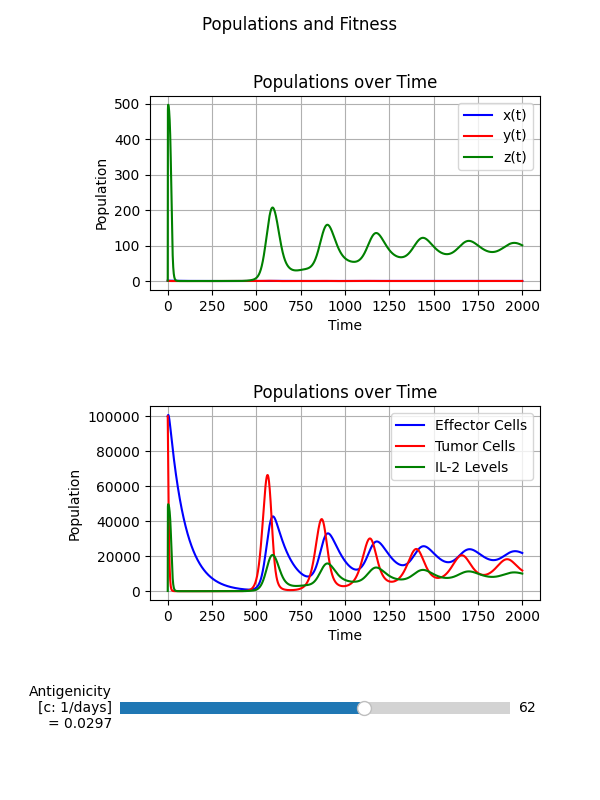

In [15]:
# initial slider value and range
antigenicity_values = np.linspace(-0.005, 0.05, 100)
init_antigenicity = 0.0297
init_idx = int(np.argmin(np.abs(antigenicity_values - init_antigenicity))) # find index closest to initial value

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_idx1(init_idx)

# create the figure and the slider
fig, axes = plot_doub_init()
plot_doub_update(axes, t, tau, x, y, z, E, T, IL, s_1_array, s_2_array)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# create the antigenicity slider
axslider = fig.add_axes([0.2, 0.1, 0.65, 0.03])

# create the slider
anti_slider = Slider(
    ax=axslider,
    label=f'Antigenicity\n[c: 1/days]\n= {init_antigenicity:.4f}',
    valmin=0,
    valmax=len(antigenicity_values)-1,
    valinit=init_idx,
    valstep=1,
)

# update function to be called when the slider's value changes
def update(val):
    idx = int(anti_slider.val)
    c_val = antigenicity_values[idx]

    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_idx1(idx)

    for ax in axes.ravel():
        ax.cla()  # clear the axis

    plot_doub_update(axes, t, tau, x, y, z, E, T, IL, s_1_array, s_2_array)
    anti_slider.label.set_text(f'Antigenicity\n[c: 1/days]\n= {c_val:.4f}')
    fig.suptitle(f'c = {c_val:.4f}')

    fig.canvas.draw_idle()

anti_slider.on_changed(update)
plt.show()

## Slider for antigenicity (c) sweep with GA input at each time step.

The goal of adding the GA's s1 and s2 input is to stabilize the tumor and minimize it if possible. This is effectively done for many of the values of c but not all. Some interesting c indexes are listed below for you to find using the slider widget.

In [4]:
# get list of files in the output data directory
filepath = glob.glob('Output_data/0003_c_sweep_ga_0/simu_data_0003_c_ga_*_.csv')
print(len(filepath), "files found.")

# function to load data based on antigenicity value
def load_idx(idx: int):
    path = filepath[idx]

    """
    Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
    """
    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data(path)
    return t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness


100 files found.


# Interesting indexes to look at: 4, 19, 27, 83, 95.

Reading data from Output_data/0001_c_sweep_0/simu_data_0001_c_1.0444444444444445_.csv


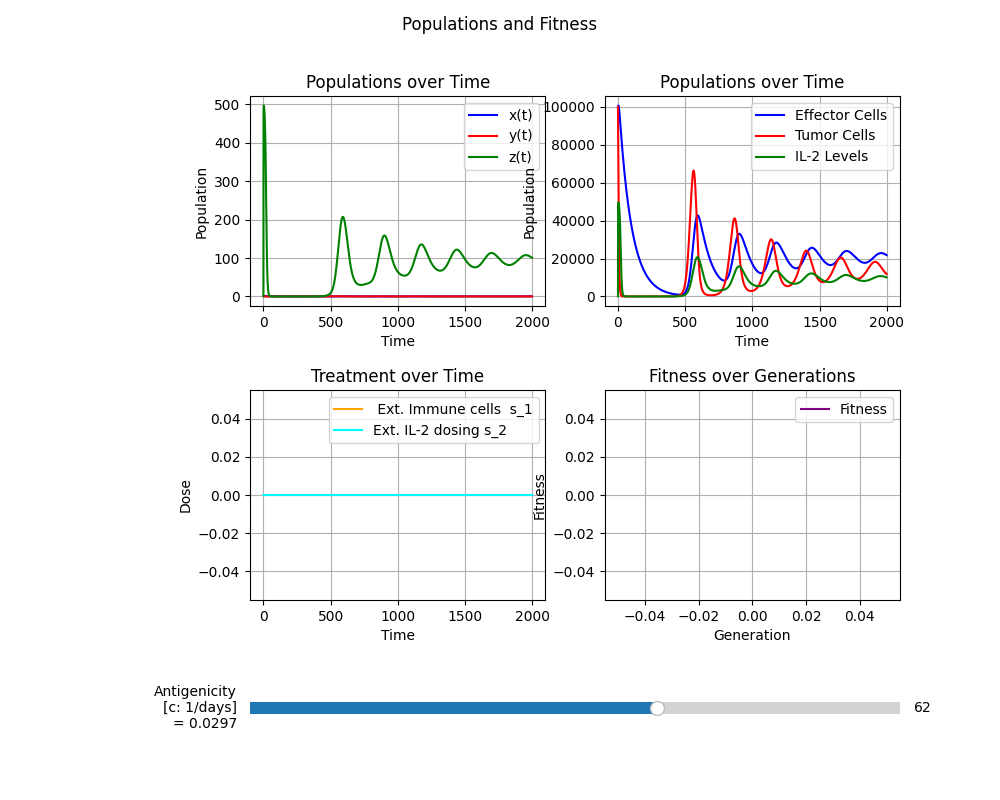

In [13]:
# initial slider value and range
antigenicity_values = np.linspace(-0.005, 0.05, 100)
init_antigenicity = 0.0297
init_idx = int(np.argmin(np.abs(antigenicity_values - init_antigenicity))) # find index closest to initial value

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_idx(init_idx)

# create the figure and the slider
fig, axes = plot_quad_init()
plot_quad_update(axes, t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# create the antigenicity slider
axslider = fig.add_axes([0.25, 0.1, 0.65, 0.03])

# create the slider
anti_slider = Slider(
    ax=axslider,
    label=f'Antigenicity\n[c: 1/days]\n= {init_antigenicity:.4f}',
    valmin=0,
    valmax=len(antigenicity_values)-1,
    valinit=init_idx,
    valstep=1,
)

# update function to be called when the slider's value changes
def update(val):
    idx = int(anti_slider.val)
    c_val = antigenicity_values[idx]

    t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_idx(idx)

    for ax in axes.ravel():
        ax.cla()  # clear the axis

    plot_quad_update(axes, t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)
    anti_slider.label.set_text(f'Antigenicity\n[c: 1/days]\n= {c_val:.4f}')
    fig.suptitle(f'c = {c_val:.4f}')
    
    fig.canvas.draw_idle()

anti_slider.on_changed(update)
plt.show()